In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pm4py import DcrGraph
graph = DcrGraph()
graph.events.add("A")
graph.events.add("B")
graph.events.add("C")
graph.events.add("D")
graph.labels.add("activity1")
graph.labels.add("activity2")
graph.labels.add("activity3")
graph.label_map["activity1"] = {"A"}
graph.label_map["activity2"] = {"B"}
graph.label_map["activity3"] = {"C"}
graph.conditions["A"] = set("B")
graph.conditions["B"] = set("C")
graph.responses["A"] = set("C")
graph.excludes["C"] = set("B")
graph.conditions["A"].add("D")
graph.includes["A"] = set("C")
graph.marking.included.add("A")
graph.marking.included.add("B")
graph.marking.included.add("C")
graph.marking.included.add("D")
print(graph)

events: {'D', 'B', 'A', 'C'}
marking: {executed: set(), included: {'D', 'B', 'A', 'C'}, pending: set()}
labels: {'activity3', 'activity2', 'activity1'}
conditionsFor: {'A': {'D', 'B'}, 'B': {'C'}}
responseTo: {'A': {'C'}}
includesTo: {'A': {'C'}}
excludesTo: {'C': {'B'}}
labelMap: {'activity1': {'A'}, 'activity2': {'B'}, 'activity3': {'C'}}



In [3]:
print(graph.get_constraints())
print(graph.get_event("A"))
print(graph.get_activity("activity1"))
del graph

6
None
{'A'}


In [4]:
import pm4py

log = pm4py.read_xes("../tests/input_data/running-example.xes")
graph, _ = pm4py.discover_dcr(log)
print(graph)
del graph

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

events: {'examine thoroughly', 'reinitiate request', 'reject request', 'examine casually', 'register request', 'pay compensation', 'decide', 'check ticket'}
marking: {executed: set(), included: {'examine thoroughly', 'reinitiate request', 'reject request', 'examine casually', 'register request', 'pay compensation', 'decide', 'check ticket'}, pending: set()}
labels: {'examine thoroughly', 'reinitiate request', 'examine casually', 'check ticket', 'register request', 'pay compensation', 'decide', 'reject request'}
conditionsFor: {'reinitiate request': {'decide'}, 'pay compensation': {'decide'}, 'reject request': {'decide'}, 'decide': {'examine casually', 'check ticket'}, 'examine thoroughly': {'register request'}, 'examine casually': {'register request'}, 'check ticket': {'register request'}}
responseTo: {'reinitiate request': {'check ticket'}, 'register request': {'check ticket'}, 'examine thoroughly': {'decide'}, 'examine casually': {'decide'}, 'check ticket': {'decide'}}
includesTo: {'

In [5]:
from pm4py.algo.discovery.dcr_discover.extenstions.nesting import NestVariants
graph, _ = pm4py.discover_dcr(log,post_process={'roles'},group_key="org:resource")
print(graph)
del graph

<super: <class 'RoleDcrGraph'>, <RoleDcrGraph object>>events: {'examine thoroughly', 'reinitiate request', 'reject request', 'examine casually', 'register request', 'pay compensation', 'decide', 'check ticket'}
marking: {executed: set(), included: {'examine thoroughly', 'reinitiate request', 'reject request', 'examine casually', 'register request', 'pay compensation', 'decide', 'check ticket'}, pending: set()}
labels: {'examine thoroughly', 'reinitiate request', 'examine casually', 'check ticket', 'register request', 'pay compensation', 'decide', 'reject request'}
conditionsFor: {'reinitiate request': {'decide'}, 'pay compensation': {'decide'}, 'reject request': {'decide'}, 'decide': {'examine casually', 'check ticket'}, 'examine thoroughly': {'register request'}, 'examine casually': {'register request'}, 'check ticket': {'register request'}}
responseTo: {'reinitiate request': {'check ticket'}, 'register request': {'check ticket'}, 'examine thoroughly': {'decide'}, 'examine casually': 

In [6]:
graph, _ = pm4py.discover_dcr(log,post_process={'roles','time','pending','nesting'},group_key="org:resource",
                              parameters={"nest_variant":NestVariants.CHOICE_NEST})
print(graph)
del graph

<super: <class 'RoleDcrGraph'>, <NestingSubprocessDcrGraph object>>events: {'examine thoroughly', 'Group2', 'reinitiate request', 'Choice1', 'examine casually', 'check ticket', 'register request', 'pay compensation', 'decide', 'Group1', 'reject request'}
marking: {executed: set(), included: {'examine thoroughly', 'Group2', 'reinitiate request', 'Choice1', 'examine casually', 'check ticket', 'register request', 'pay compensation', 'decide', 'Group1', 'reject request'}, pending: set()}
labels: set()
conditionsFor: {'examine thoroughly': {'register request'}, 'decide': {'Group1'}, 'Group1': {'register request'}, 'Group2': {'decide'}}
responseTo: {'examine thoroughly': {'decide'}, 'reinitiate request': {'check ticket'}, 'register request': {'check ticket'}, 'Group1': {'decide'}}
includesTo: {'decide': {'reinitiate request'}}
excludesTo: {'examine thoroughly': {'examine thoroughly', 'examine casually'}, 'reinitiate request': {'reinitiate request'}, 'Choice1': {'decide', 'Group1', 'Choice1'}

In [14]:
graph, _ = pm4py.discover_dcr(log)
graph

events: {'examine thoroughly', 'reinitiate request', 'reject request', 'examine casually', 'register request', 'pay compensation', 'decide', 'check ticket'}
marking: {executed: set(), included: {'examine thoroughly', 'reinitiate request', 'reject request', 'examine casually', 'register request', 'pay compensation', 'decide', 'check ticket'}, pending: set()}
labels: {'examine thoroughly', 'reinitiate request', 'examine casually', 'check ticket', 'register request', 'pay compensation', 'decide', 'reject request'}
conditionsFor: {'reinitiate request': {'decide'}, 'pay compensation': {'decide'}, 'reject request': {'decide'}, 'decide': {'examine casually', 'check ticket'}, 'examine thoroughly': {'register request'}, 'examine casually': {'register request'}, 'check ticket': {'register request'}}
responseTo: {'reinitiate request': {'check ticket'}, 'register request': {'check ticket'}, 'examine thoroughly': {'decide'}, 'examine casually': {'decide'}, 'check ticket': {'decide'}}
includesTo: {'

In [16]:
pm4py.save_vis_dcr(graph,'here.png')

''

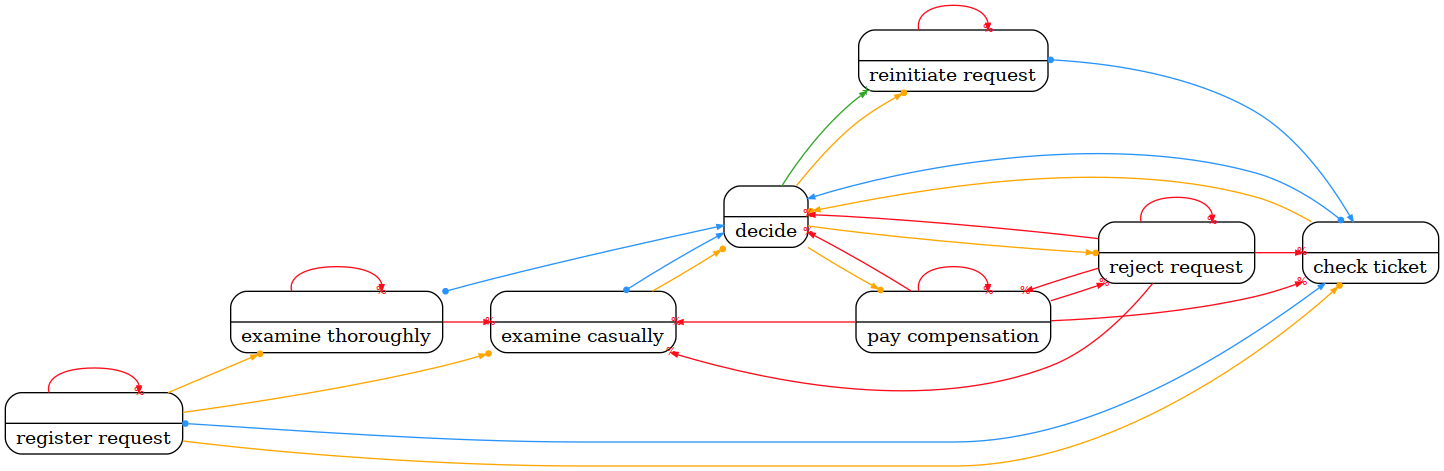

In [17]:
pm4py.view_dcr(graph)